# Checking DeepChem with Ruibo's data

In [53]:
import os
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
# Get bigger images
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from PIL import Image, ImageDraw, ImageFont

# import ImageDraw


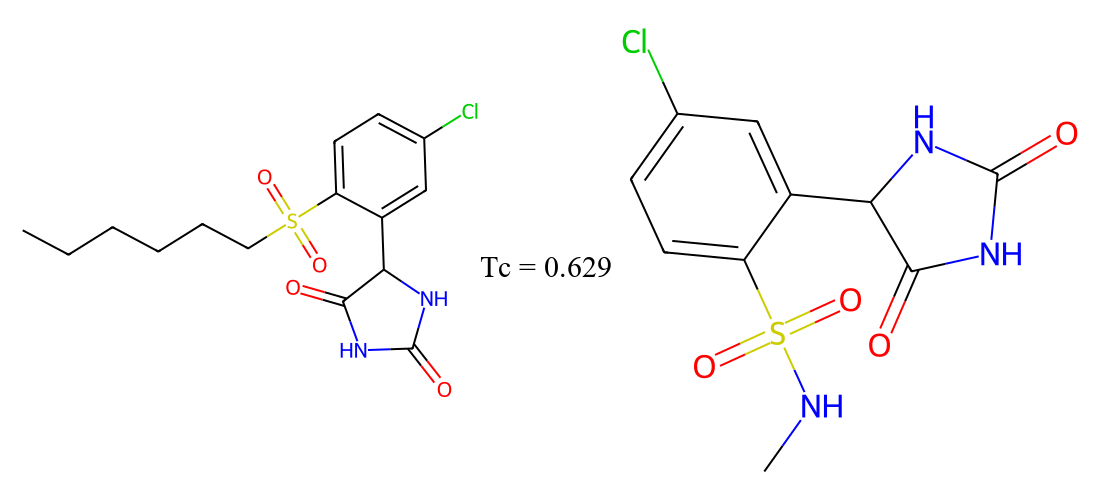

In [103]:
# Test in a kinase inhibitor
mol1 = Chem.MolFromSmiles("CCCCCCS(=O)(=O)c1ccc(Cl)cc1C1NC(=O)NC1=O")
mol2 = Chem.MolFromSmiles("CNS(=O)(=O)c1ccc(Cl)cc1C1NC(=O)NC1=O")
# Anchor the molecules to the same position
mol1 = Chem.RemoveHs(mol1)
mol2 = Chem.RemoveHs(mol2)
# AllChem.EmbedMolecule(mol1)
# AllChem.EmbedMolecule(mol2)
# AllChem.AlignMol(mol1, mol2)
# Get a big image
img1 = Draw.MolToImage(mol1, size=(500, 500))
img2 = Draw.MolToImage(mol2, size=(500, 500))
# Put both images together, leaving some space in the middle
img = Image.new('RGB', (1100, 500))
img.paste(img1, (0, 0))
img.paste(img2, (600, 0))
# Fill the space in the middle with a white rectangle
draw = ImageDraw.Draw(img)
draw.rectangle([(500, 0), (600, 500)], fill=(255, 255, 255))


# Compute the Tanimoto similarity between mol1 and mol2
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
# print(similarity)
# Annotate in the middle the Tanimoto similarity
d = ImageDraw.Draw(img)
d.text((480, 250), f"Tc ={similarity : .3f} ", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))
img

## Parsing through folders:

In [102]:
os.listdir('./batch1/CHEMBL1293255/')

df = pd.read_csv('./batch1/CHEMBL1293255/data_cp.csv')

"""Now I will build a Dataframe with the SMILES of the first compund, the SMILES of the second compund, 
the pChEMBL value of each one, and the Tanimoto similarity between them."""

# First compare the tanimoto similarity between the first compound and the rest of the compounds

first_compound = df['Smiles'][0]

# Compare the first compound with the rest of the compounds
tanimoto_similarity = []
for i in range(1, len(df)):
    tanimoto_similarity.append(DataStructs.FingerprintSimilarity(Chem.RDKFingerprint(Chem.MolFromSmiles(first_compound)), Chem.RDKFingerprint(Chem.MolFromSmiles(df['Smiles'][i]))))

# Build the Dataframe
df_tanimoto = pd.DataFrame({'Smiles': df['Smiles'][1:], 'Tanimoto': tanimoto_similarity})

# Get only the compounds with a Tanimoto similarity greater than 0.9
df_tanimoto = df_tanimoto[df_tanimoto['Tanimoto'] > 0.9]

# 
df

,Compound_ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Target ChEMBL ID,n_isomers
0,CHEMBL599406,O=C1N=C(O)S/C1=C\c1ccc(OCCC2CCCCC2)cc1,IC50,=,51.0,nM,7.29,CHEMBL1069650,CHEMBL1293255,1
1,CHEMBL599407,O=C1N=C(O)S/C1=C\c1ccc(OCCN2CCS(=O)(=O)CC2)cc1,IC50,=,274.0,nM,6.56,CHEMBL1069650,CHEMBL1293255,1
2,CHEMBL590265,O=C1N=C(O)S/C1=C\c1ccc(OCCc2cccs2)cc1,IC50,=,31.0,nM,7.51,CHEMBL1069650,CHEMBL1293255,1
3,CHEMBL599002,O=C1N=C(O)S/C1=C\c1ccc(OCCN2CCOCC2)cc1,IC50,=,713.0,nM,6.15,CHEMBL1069650,CHEMBL1293255,1
4,CHEMBL610221,O=C1N=C(O)S/C1=C\c1ccc(OCCc2cscc2)cc1,IC50,=,60.0,nM,7.22,CHEMBL1069650,CHEMBL1293255,1
...,...,...,...,...,...,...,...,...,...,...
268,CHEMBL4074740,COCCC[S+]([O-])c1c(N)c2c(-c3cnc(C)n3C)cc(-c3nc...,IC50,=,3.3,nM,8.48,CHEMBL4051488,CHEMBL1293255,2
269,CHEMBL4075972,CCCCS(=O)(=O)c1c(N)c2c(-c3cnc(C)n3C)cc(-c3nccs...,IC50,=,32.0,nM,7.50,CHEMBL4051488,CHEMBL1293255,1
270,CHEMBL4071027,CCCC[S+]([O-])c1nc2ccc(-c3cccs3)nc2s1,IC50,=,1230.0,nM,5.91,CHEMBL4051488,CHEMBL1293255,2
271,CHEMBL4086012,O=C(Cc1nn(-c2ccccc2)nn1)c1ccccc1,IC50,=,50000.0,nM,4.30,CHEMBL4051524,CHEMBL1293255,1


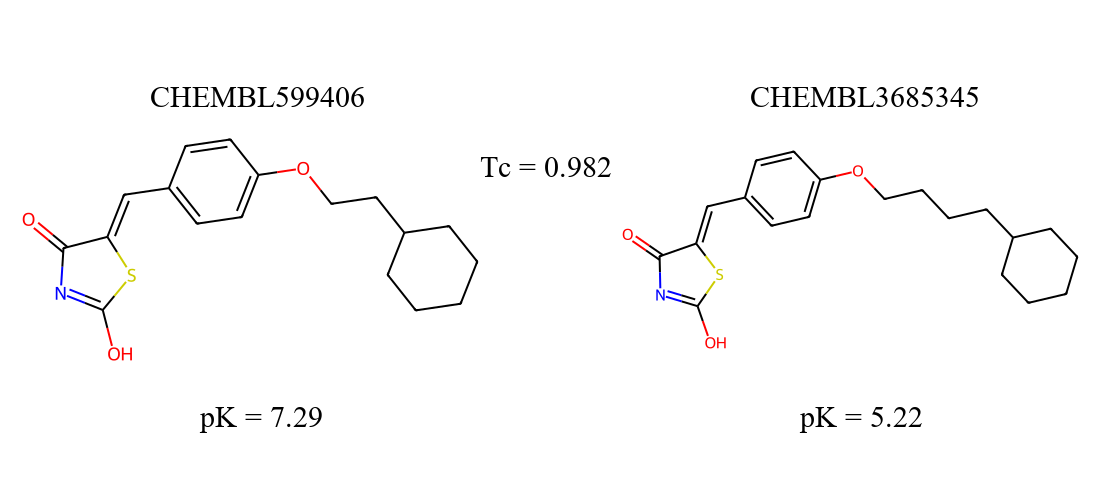

In [110]:
second = 145
mol1 = Chem.MolFromSmiles(df.Smiles[0])
mol2 = Chem.MolFromSmiles(df.Smiles[second])
# Fit both molecules to the same alignment
# AllChem.GenerateDepictionMatching2DStructure(mol1, mol2)

img1 = Draw.MolToImage(mol1, size=(500, 500))
img2 = Draw.MolToImage(mol2, size=(500, 500))
# Put both images together, leaving some space in the middle
img = Image.new('RGB', (1100, 500))
img.paste(img1, (0, 0))
img.paste(img2, (600, 0))
# Fill the space in the middle with a white rectangle
draw = ImageDraw.Draw(img)
draw.rectangle([(500, 0), (600, 500)], fill=(255, 255, 255))


# Compute the Tanimoto similarity between mol1 and mol2
fp1 = AllChem.RDKFingerprint(mol1, 2)
fp2 = AllChem.RDKFingerprint(mol2, 2)
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
# print(similarity)
# Annotate in the middle the Tanimoto similarity
d = ImageDraw.Draw(img)
d.text((480, 150), f"Tc ={similarity : .3f} ", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))
# Annotate the pChEMBL value of each molecule, below the molecule
d.text((200, 400), f"pK = {df['pChEMBL Value'][0]}", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))
d.text((800, 400), f"pK = {df['pChEMBL Value'][second]}", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))

# Put the compound IDs on top
d.text((150, 80), f"{df['Compound_ID'][0]}", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))
d.text((750, 80), f"{df['Compound_ID'][second]}", 
       fill=(0, 0, 0), 
       font=ImageFont.truetype("times.ttf", 30))
img